# Exploratory Data Analysis

Here I just create a few plots and tables for EDA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Data set from Wordle Solver
Table containing the stats of each wordle game played. The number of vowels, duplicate sets, and the duplicate degree refer to the target word being guessed.

In [2]:
# Raw Data
data = pd.read_csv('wordleData.csv')
data

,TargetWord,WinStatus,NumGuesses,Vowels,DuplicateSets,DuplicateDegree
0,aback,1,4,2,1,2
1,aback,1,5,2,1,2
2,aback,1,5,2,1,2
3,aback,1,5,2,1,2
4,aback,1,6,2,1,2
...,...,...,...,...,...,...
231495,zonal,1,5,2,0,1
231496,zonal,1,5,2,0,1
231497,zonal,1,5,2,0,1
231498,zonal,1,4,2,0,1


## Baseline Characteristics
Overall, the solver performed rather well, winning 88% of it's games and taking 4.7 guesses on average.

In [3]:
print(data.describe())

           WinStatus     NumGuesses         Vowels  DuplicateSets  \
count  231500.000000  231500.000000  231500.000000  231500.000000   
mean        0.887214       4.775810       1.772786       0.340389   
std         0.316332       1.013787       0.625067       0.508152   
min         0.000000       1.000000       0.000000       0.000000   
25%         1.000000       4.000000       1.000000       0.000000   
50%         1.000000       5.000000       2.000000       0.000000   
75%         1.000000       6.000000       2.000000       1.000000   
max         1.000000       6.000000       4.000000       2.000000   

       DuplicateDegree  
count    231500.000000  
mean          1.349028  
std           0.528247  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           4.000000  


### Means (Grouped by target word)
I grouped the data by target word and aggregated the rows by mean.

In [4]:
grouped = data.groupby('TargetWord')
means = grouped.aggregate('mean')
means

,WinStatus,NumGuesses,Vowels,DuplicateSets,DuplicateDegree
TargetWord,,,,,
aback,0.93,4.76,2.0,1.0,2.0
abase,0.95,4.78,3.0,1.0,2.0
abate,0.82,4.91,3.0,1.0,2.0
abbey,0.99,4.67,2.0,1.0,2.0
abbot,0.95,4.81,2.0,1.0,2.0
...,...,...,...,...,...
young,0.97,4.17,2.0,0.0,1.0
youth,0.91,4.55,2.0,0.0,1.0
zebra,1.00,4.47,2.0,0.0,1.0


### Distribution of Win Rates (By Target Word)
Interestingly, we see that the frequency grows with a higher win rate, indicating that the solver successfully solves most of it's games.

Text(0.5, 1.0, 'Distribution of Win Rates (By Target Word)')

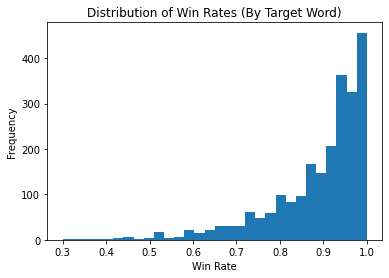

In [5]:
plt.hist(means.WinStatus, bins=30)
plt.xlabel('Win Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Win Rates (By Target Word)')

### Average of Number of Guesses (By Target Word)

Mean:  4.78
Standard Deviation:  0.9714326186420481
Median:  4.76
IQR: 1.0


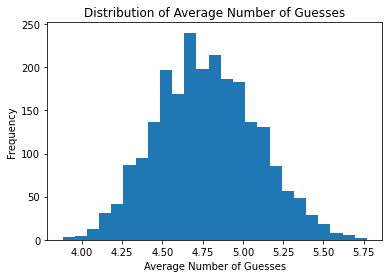

In [41]:
plt.hist(means.NumGuesses, bins=25)
plt.xlabel('Average Number of Guesses')
plt.ylabel('Frequency')
plt.title('Distribution of Average Number of Guesses')

mean = np.round(np.mean(means.NumGuesses), 2)
sd = np.std(wins.NumGuesses)
median = np.median(means.NumGuesses)
Q1 = np.percentile(wins.NumGuesses, 25)
Q3 = np.percentile(wins.NumGuesses, 75)
iqr = Q3 - Q1

print('Mean: ', mean)
print('Standard Deviation: ', sd)
print('Median: ', median)
print('IQR:', iqr)

### Average Number of Guesses vs Win Rate (Grouped by Target Word)

The scatter plot would suggest that words with a higher win rate would take less guesses on average. This isn't a very useful insight though: if the solver was take more than six guesses, it would lose the game. Words that have more of these losses would therefore have a higher average number of guesses.

Text(0.5, 1.0, 'Average Number of Guesses vs Win Rate')

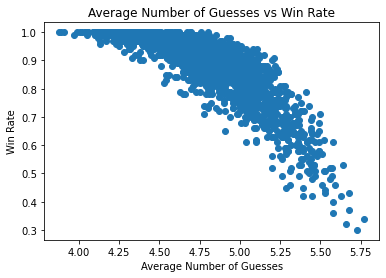

In [32]:
plt.scatter(means.NumGuesses, means.WinStatus)
plt.xlabel('Average Number of Guesses')
plt.ylabel('Win Rate')
plt.title('Average Number of Guesses vs Win Rate')

## Wins vs Losses
I split the sample into 2 different groups to analyze if there were any statistical differences between the two. I compared the 2 populations on the different variables individually.

In [7]:
# Separate the groups into wins and losses

wins = data[data['WinStatus'] == 1]
losses = data[data['WinStatus'] == 0]

### Distribution of Vowel Count

Created 2 histograms (density) to see the general shape of the distributions with respect to vowel count. At a glance there did not appear to much difference between the 2 distributions, both being normal.

Text(0.5, 1.0, 'Losses')

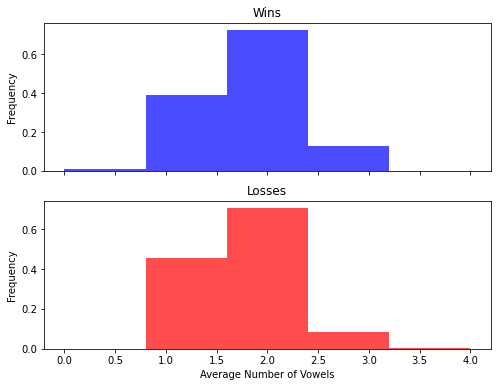

In [12]:
binNum = 5 # Number of bins

fig, (win_dist, loss_dist) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

win_dist.hist(wins.Vowels, bins=binNum, color='blue', alpha=0.7, density=True)
win_dist.set_ylabel('Frequency')
win_dist.set_title('Wins')

loss_dist.hist(losses.Vowels, bins=binNum, color='red', alpha=0.7, density=True)
loss_dist.set_xlabel('Number of Vowels')
loss_dist.set_ylabel('Frequency')
loss_dist.set_title('Losses')

### Distribution of Duplicate Set Count

In both samples, we observe a strong right skew.

Text(0.5, 1.0, 'Losses')

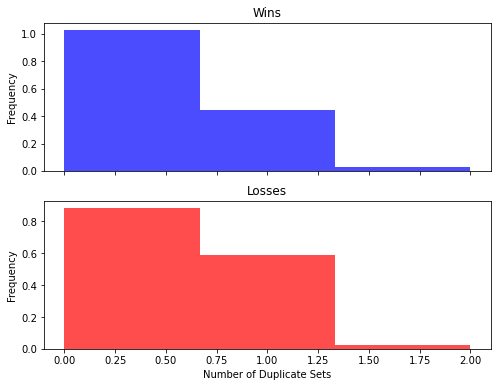

In [17]:
# Created 2 histograms (density) to see the general shape of the distributions with respect to vowel count.

binNum = 3 # Number of bins

fig, (win_dist, loss_dist) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

win_dist.hist(wins.DuplicateSets, bins=binNum, color='blue', alpha=0.7, density=True)
win_dist.set_ylabel('Frequency')
win_dist.set_title('Wins')

loss_dist.hist(losses.DuplicateSets, bins=binNum, color='red', alpha=0.7, density=True)
loss_dist.set_xlabel('Number of Duplicate Sets')
loss_dist.set_ylabel('Frequency')
loss_dist.set_title('Losses')

### Distribution of Duplicate Degrees

Again, a right skew is observed in both groups.

Text(0.5, 1.0, 'Losses')

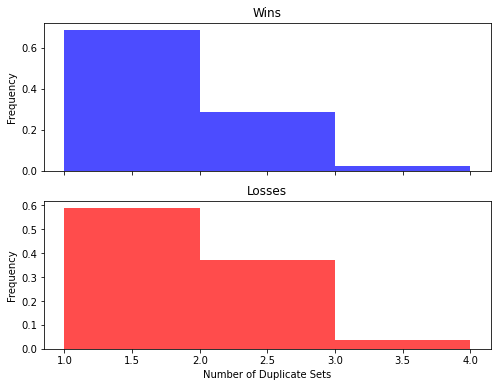

In [18]:
# Created 2 histograms (density) to see the general shape of the distributions with respect to vowel count.

binNum = 3 # Number of bins

fig, (win_dist, loss_dist) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

win_dist.hist(wins.DuplicateDegree, bins=binNum, color='blue', alpha=0.7, density=True)
win_dist.set_ylabel('Frequency')
win_dist.set_title('Wins')

loss_dist.hist(losses.DuplicateDegree, bins=binNum, color='red', alpha=0.7, density=True)
loss_dist.set_xlabel('Number of Duplicate Sets')
loss_dist.set_ylabel('Frequency')
loss_dist.set_title('Losses')

## Wins Only

There were a few characterisitcs I was curious about within the group of wins itself.

### Distribution of Average Number of Guesses

The distribution was had a somewhat noticeable left skew. In addition, I computed the mean, which was at 4.62 guesses.

Mean:  4.620185987633283
Standard Deviation:  0.9714326186420481
Median:  5.0
IQR: 1.0


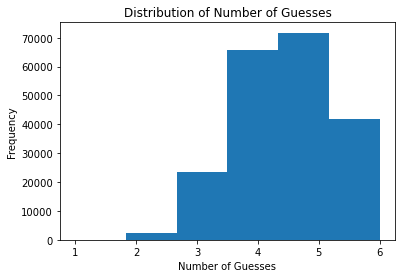

In [42]:
plt.hist(wins.NumGuesses, bins=6)
plt.xlabel('Number of Guesses')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Guesses')

win_guess_mean = np.mean(wins.NumGuesses) # Mean
win_guess_sd = np.std(wins.NumGuesses) # Standard Deviation
win_guess_median = np.median(wins.NumGuesses) # Median
Q1 = np.percentile(wins.NumGuesses, 25)
Q3 = np.percentile(wins.NumGuesses, 75)
win_guess_iqr = Q3 - Q1 # IQR

print('Mean: ', win_guess_mean)
print('Standard Deviation: ', win_guess_sd)
print('Median: ', win_guess_median)
print('IQR:', win_guess_iqr)